# Youden Index. Interpretation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
cutoff = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], cutoff[i] = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/home/ibon/anaconda3/envs/paper/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


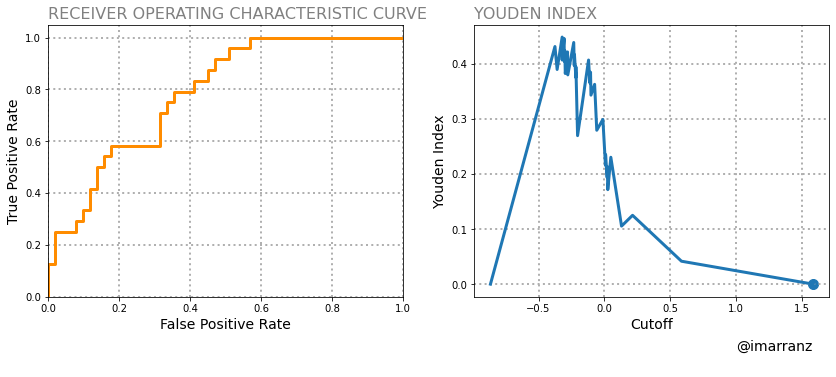

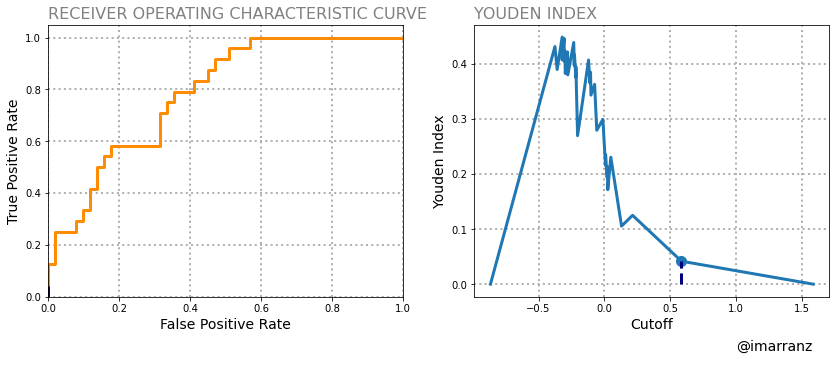

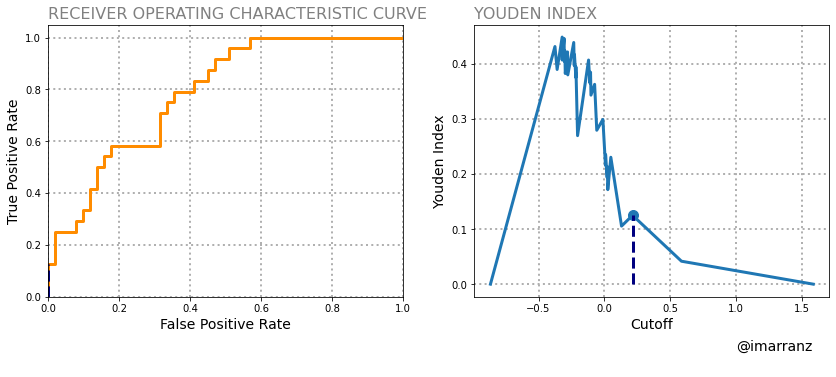

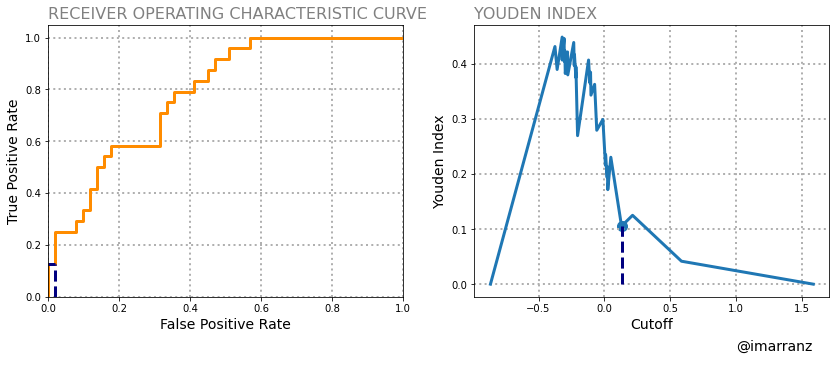

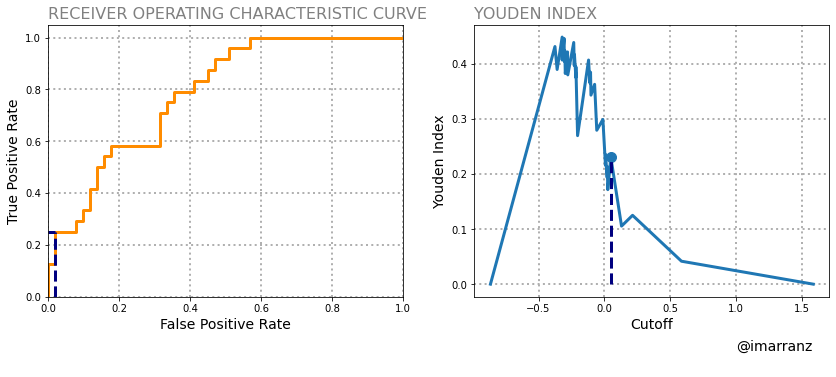

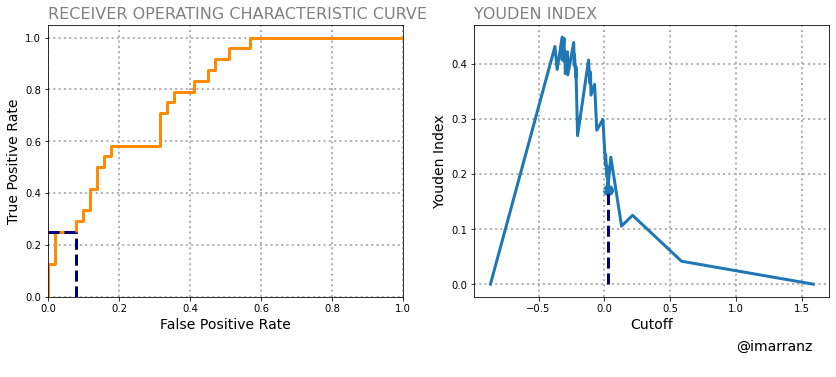

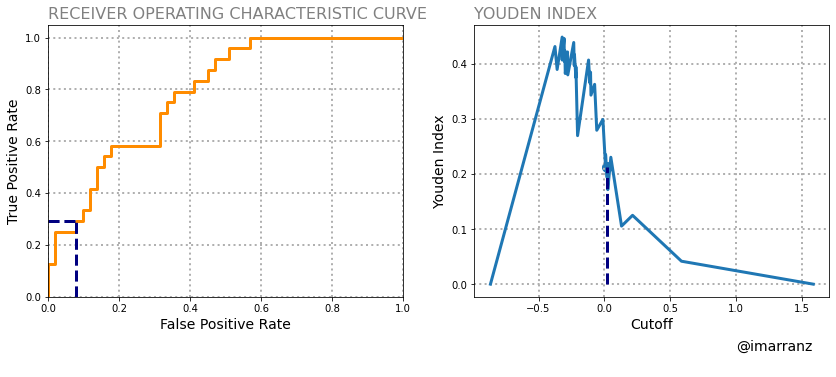

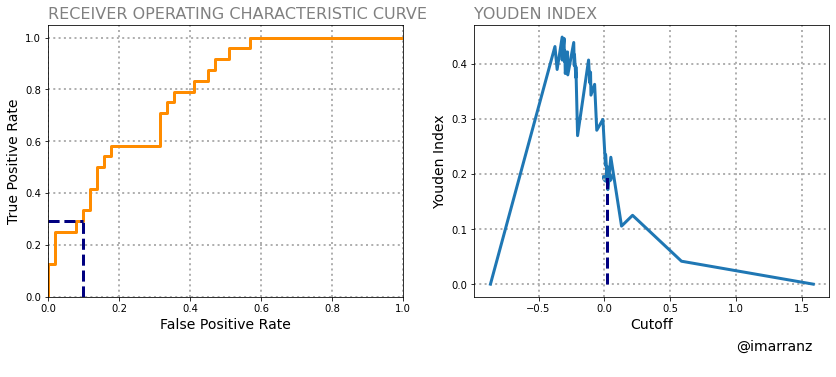

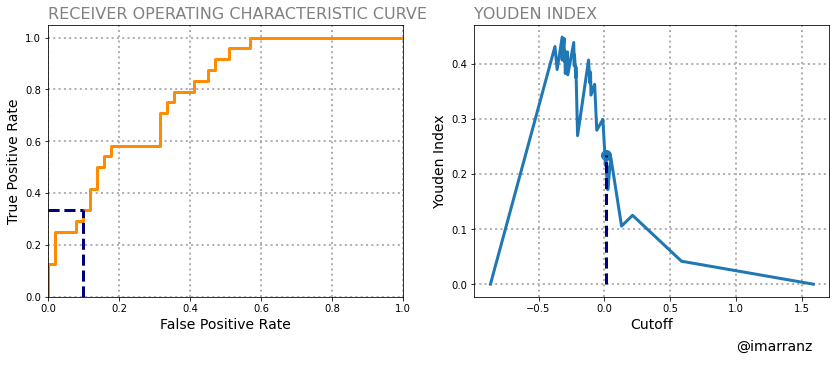

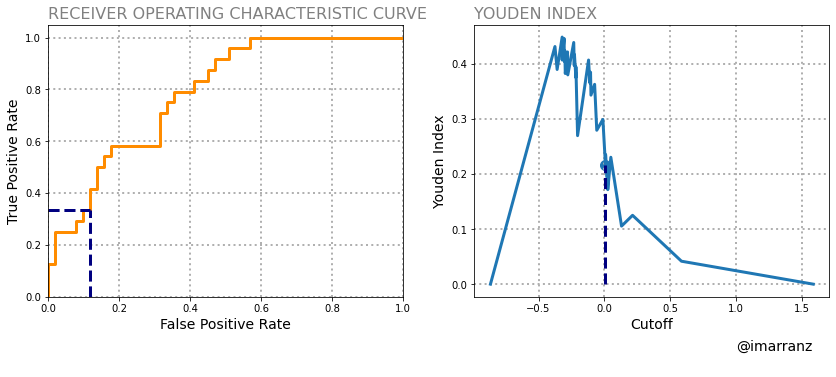

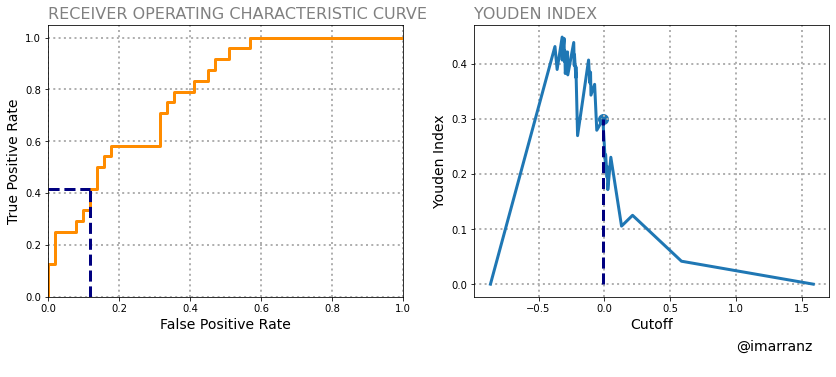

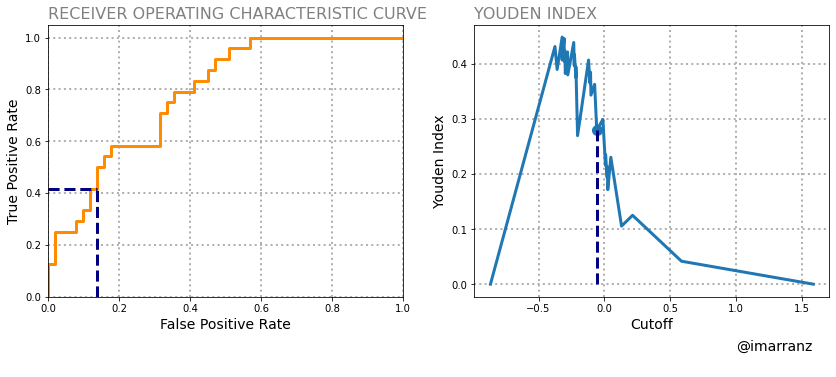

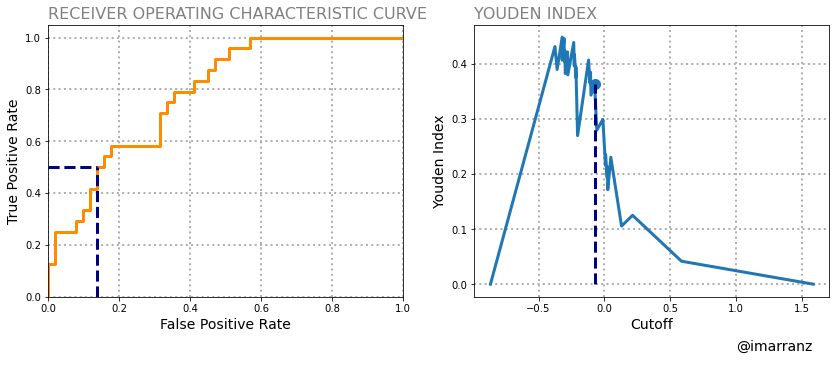

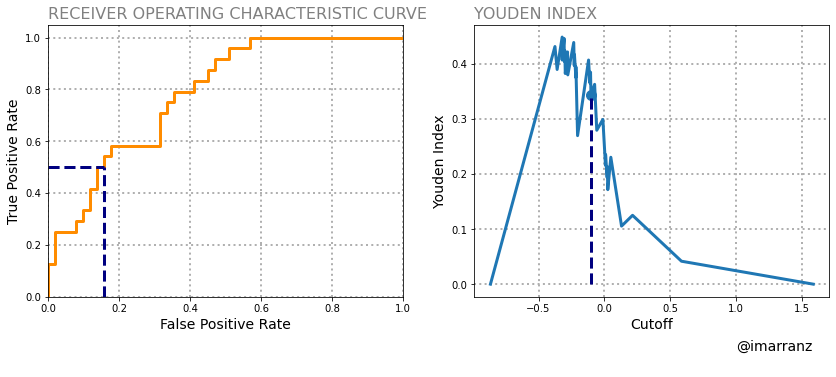

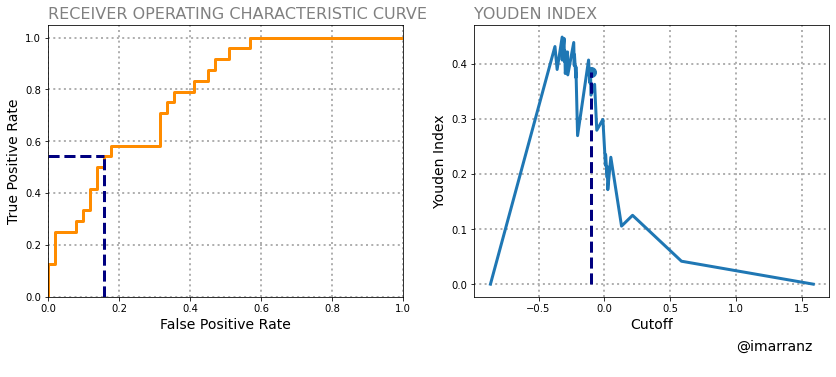

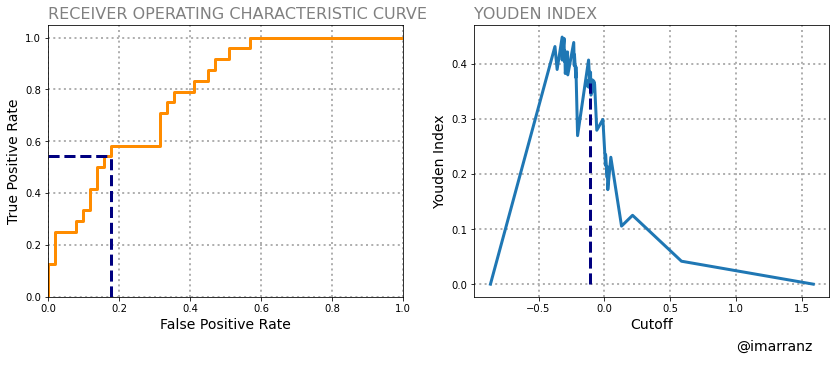

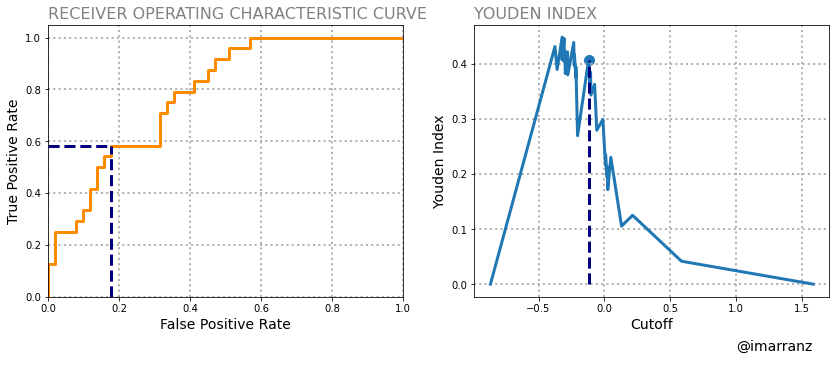

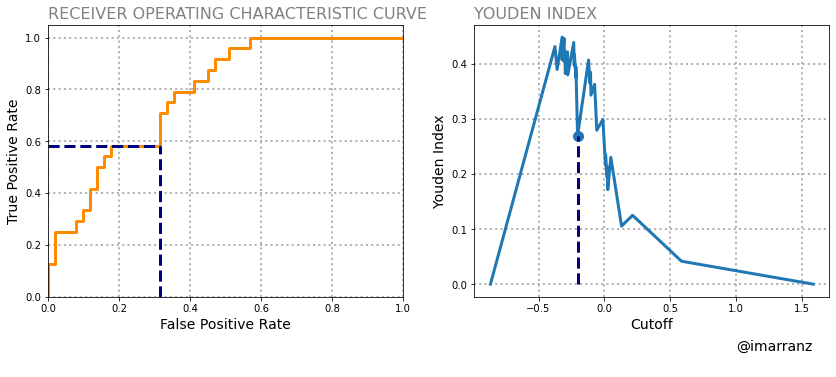

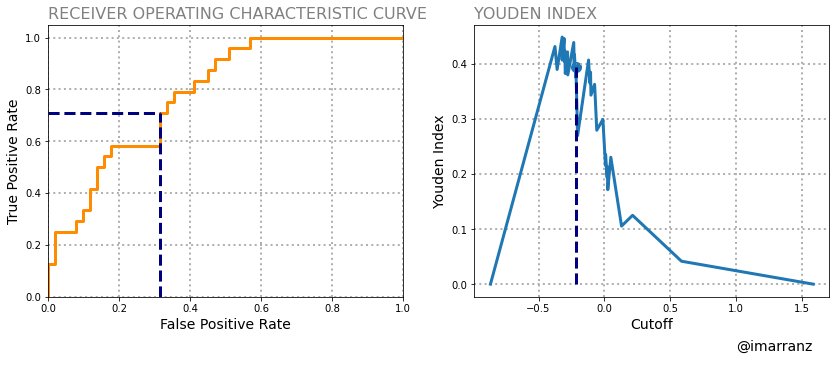

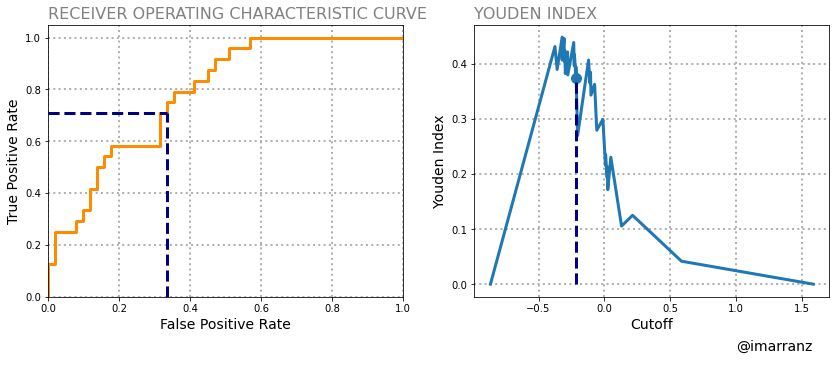

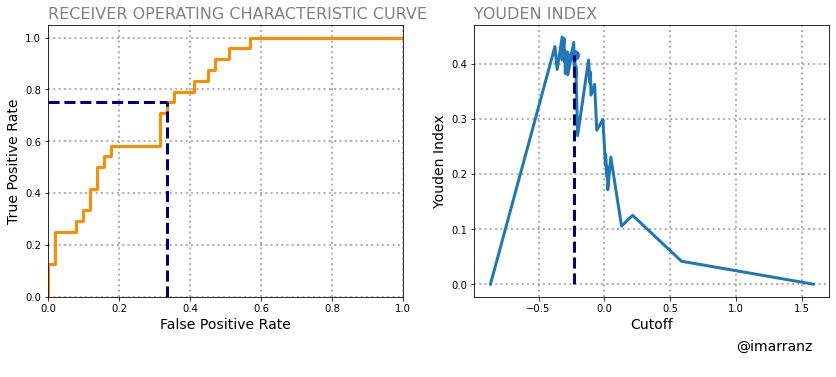

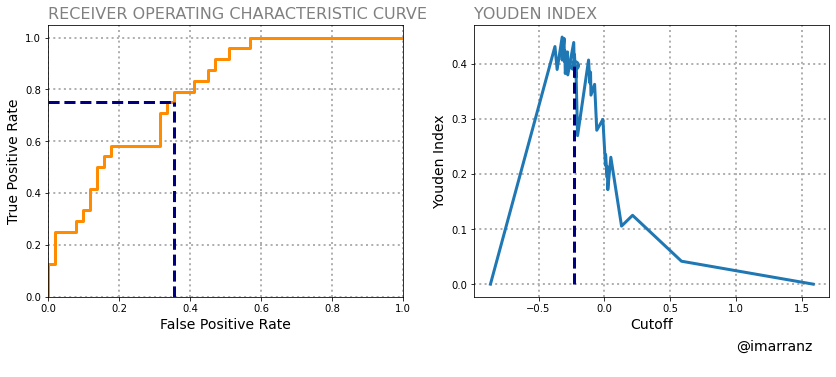

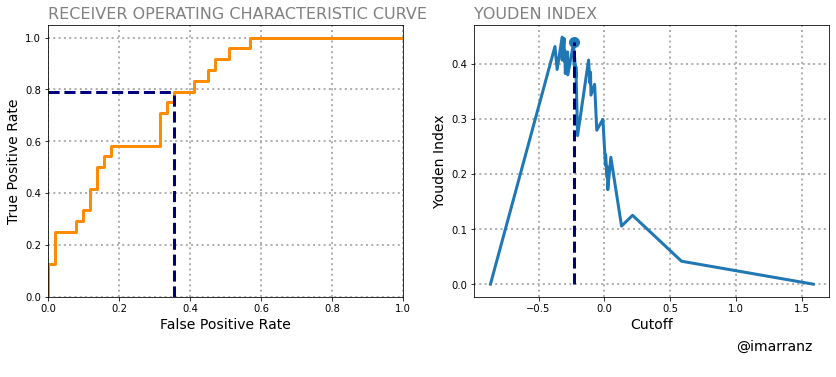

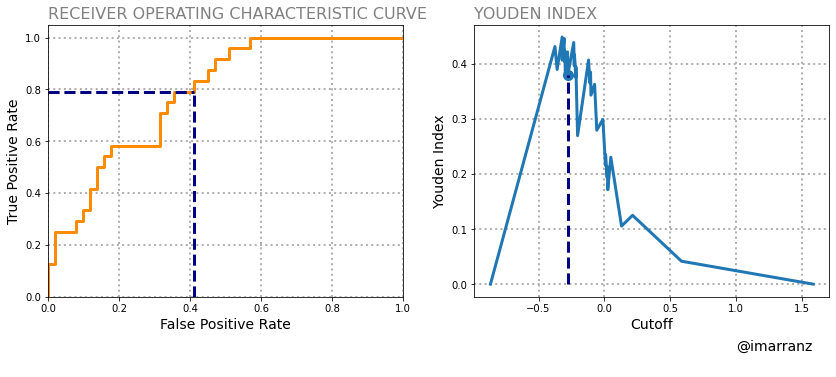

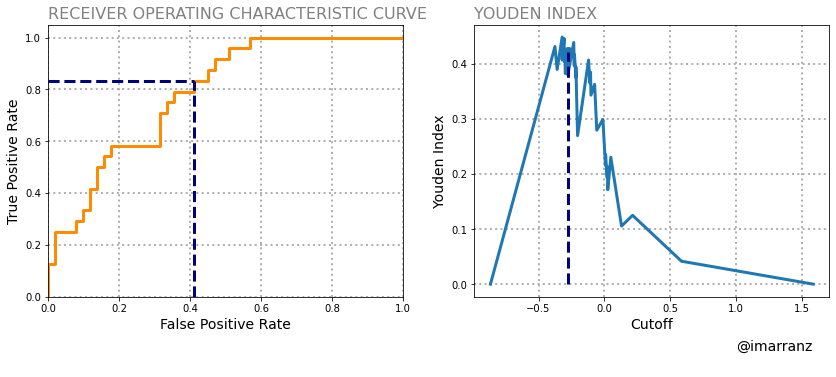

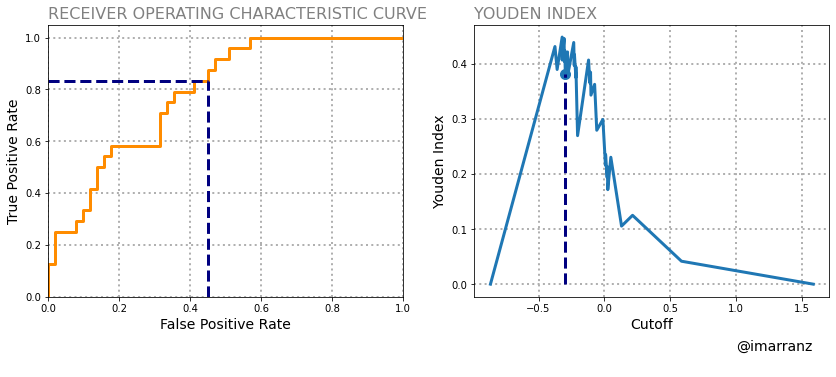

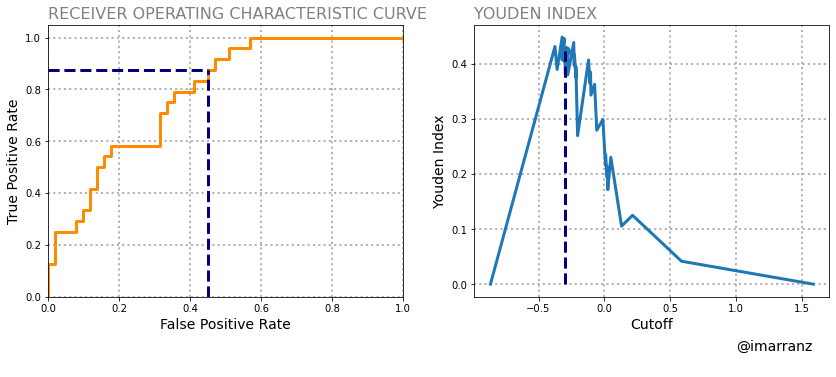

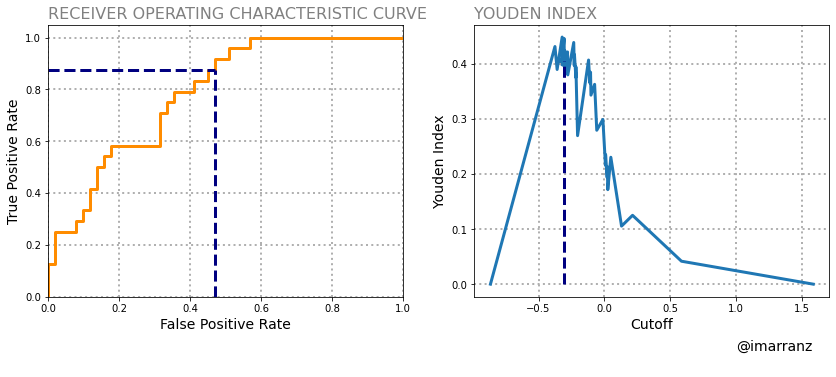

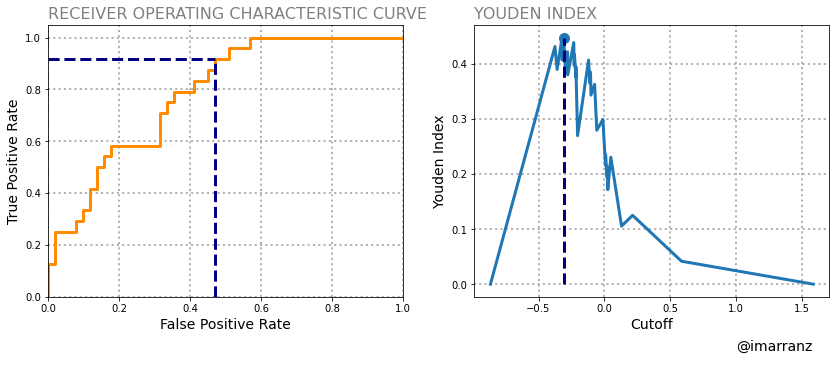

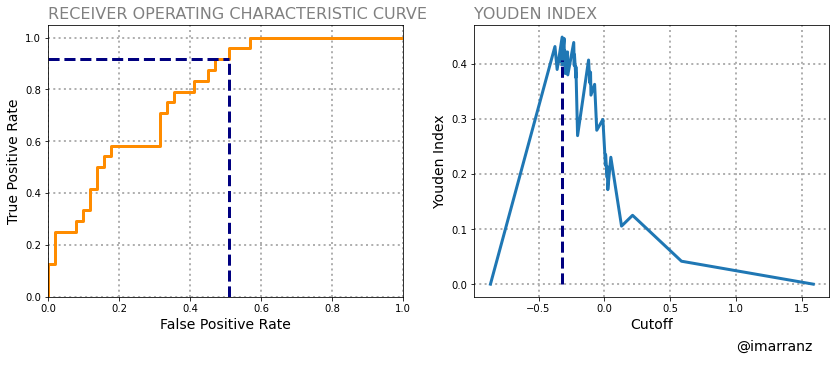

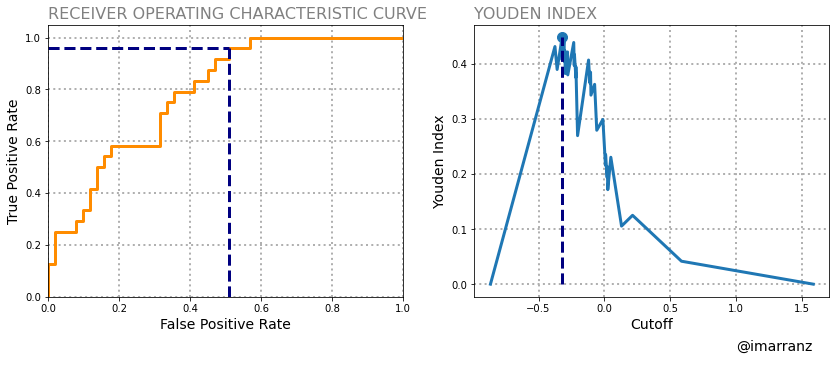

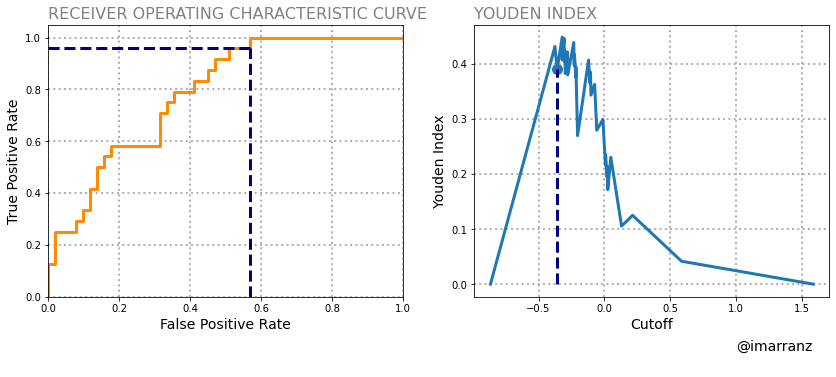

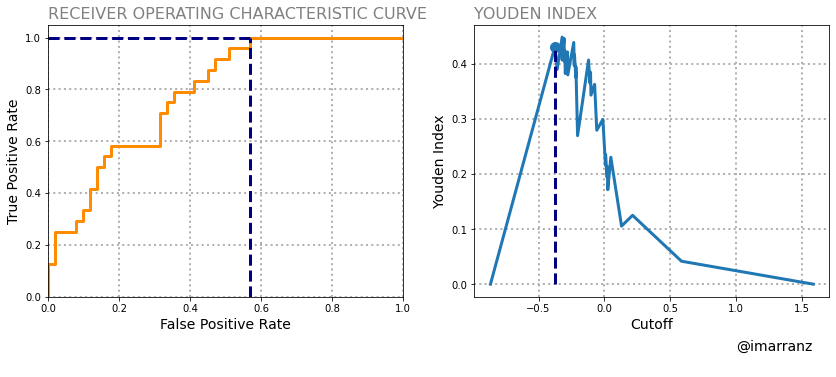

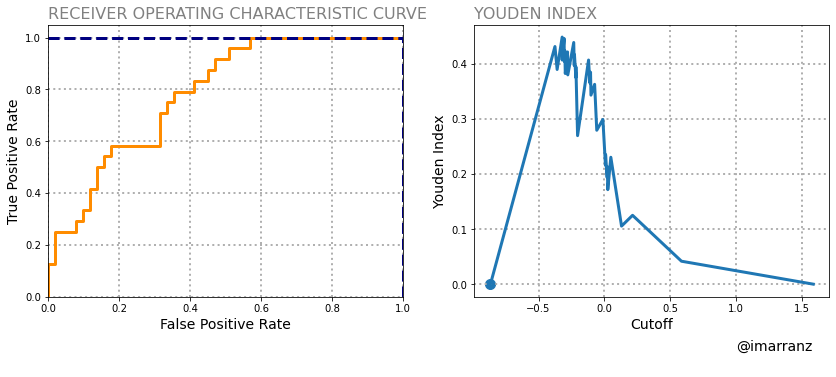

In [9]:
for pnt in range(len(tpr[2])):

    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5), )

    lw = 3
    ax1.plot(
        fpr[2],
        tpr[2],
        color = "darkorange",
        lw = lw,
        label = "ROC curve (area = %0.2f)" % roc_auc[2],
    )
    #ax1.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel("False Positive Rate", fontsize = 14)
    ax1.set_ylabel("True Positive Rate", fontsize = 14)
    ax1.set_title("Receiver Operating Characteristic Curve".upper(), color = 'gray', loc ='left', fontsize = 16)
    #ax1.legend(loc="lower right")

    ax2.plot(cutoff[2], tpr[2]-fpr[2], lw = lw)
    ax2.set_title("Youden Index".upper(), color = 'gray', loc ='left', fontsize = 16)
    ax2.set_xlabel('Cutoff', fontsize = 14)
    ax2.set_ylabel('Youden Index', fontsize = 14)

    
    for ax in [ax1, ax2]:

        ax.grid(linestyle = ':', lw = 2)
        ax.set_facecolor('#FFFFFF')


    ax1.plot([0, fpr[2][pnt]], [tpr[2][pnt], tpr[2][pnt]], color="navy", lw=lw, linestyle="--")    
    ax1.plot([fpr[2][pnt], fpr[2][pnt]], [0, tpr[2][pnt]], color="navy", lw=lw, linestyle="--")    

    ax2.plot([cutoff[2][pnt], cutoff[2][pnt]], [0, tpr[2][pnt] - fpr[2][pnt]], lw = lw, linestyle = '--', color = 'navy')
    ax2.scatter(x = cutoff[2][pnt], y = tpr[2][pnt] - fpr[2][pnt], s = 100)
    ax2.text(1, -0.15, '@imarranz\n', fontsize = 14)

    fig.savefig('figures/' + str(pnt).rjust(3, '0') + 'figura.jpeg', dpi = 75, bbox_inches = 'tight')    

In [10]:
import os

filenames = os.listdir('./figures/')
filenames.sort()

In [11]:
images = []
for filename in filenames:
    images.append(imageio.imread('./figures/' + filename))
imageio.mimsave('youden.gif', images, fps = 2.5)